In [1]:
import pandas as pd 
from scipy.special import factorial
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
link = "D:\\Data\\1000_clean_data.csv"
df = pd.read_csv(link)
data = df[['gf', 'ga', 'team', 'opponent', 'venue']].copy()
data

,gf,ga,team,opponent,venue
0,2.0,0.0,Manchester City,West Ham,Away
1,4.0,0.0,Manchester City,Bournemouth,Home
2,3.0,3.0,Manchester City,Newcastle Utd,Away
3,4.0,2.0,Manchester City,Crystal Palace,Home
4,6.0,0.0,Manchester City,Nott'ham Forest,Home
...,...,...,...,...,...
1491,0.0,2.0,Norwich City,Aston Villa,Away
1492,0.0,4.0,Norwich City,West Ham,Home
1493,0.0,3.0,Norwich City,Leicester City,Away
1494,1.0,1.0,Norwich City,Wolves,Away


In [2]:
data.describe()

,gf,ga
count,1496.000000,1496.000000
mean,1.413770,1.413770
std,1.307267,1.307267
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,9.000000


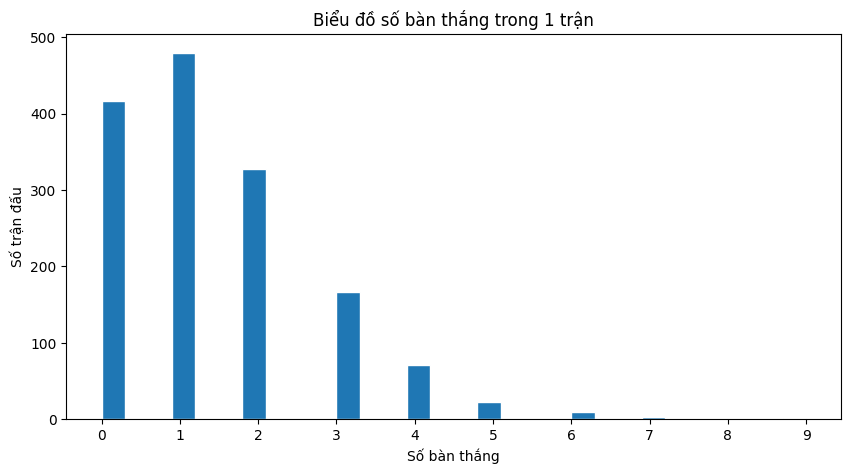

In [3]:
plt.figure(figsize = (10,5))
plt.hist(data.gf,bins=30,edgecolor='white')
plt.xticks(range(10))
plt.xlabel('Số bàn thắng')  # Nhãn trục x
plt.ylabel('Số trận đấu')  # Nhãn trục y
plt.title('Biểu đồ số bàn thắng trong 1 trận')  # Tiêu đề biểu đồ
plt.show()

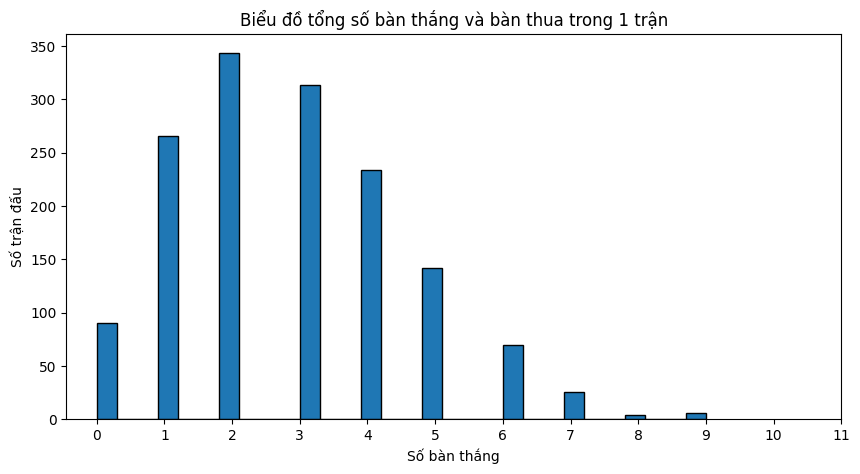

In [4]:
data['total_goals']=data['gf']+data['ga']
plt.figure(figsize = (10,5))
plt.hist(data.total_goals,bins=30,edgecolor='black')
plt.xticks(range(12))
plt.xlabel('Số bàn thắng')  # Nhãn trục x
plt.ylabel('Số trận đấu')  # Nhãn trục y
plt.title('Biểu đồ tổng số bàn thắng và bàn thua trong 1 trận')  # Tiêu đề biểu đồ
plt.show()

In [5]:
home_goals = df['gf']
away_goals = df['ga']
total_goals = home_goals + away_goals
lamda = round(total_goals.mean(), 2)
lamda

2.83

In [6]:
# Possion: P(x; μ) = (e-μ) (μx) / x!

def poisson(k,exp_events):
    minutes=90
    lam =(exp_events)
    p= np.exp(-lam)*np.power(lam,k)/factorial(k)
    return p

In [7]:
k=[]
p=[]
for i in range(10):
    p.append(poisson(i,lamda)*100)
    k.append(i)
for i in range(10):
    print(f"Tỷ lệ có {k[i]} bàn thắng trong 90 phút là {p[i]}")

Tỷ lệ có 0 bàn thắng trong 90 phút là 5.9012853669447844
Tỷ lệ có 1 bàn thắng trong 90 phút là 16.70063758845374
Tỷ lệ có 2 bàn thắng trong 90 phút là 23.631402187662044
Tỷ lệ có 3 bàn thắng trong 90 phút là 22.29228939702786
Tỷ lệ có 4 bàn thắng trong 90 phút là 15.77179474839721
Tỷ lệ có 5 bàn thắng trong 90 phút là 8.92683582759282
Tỷ lệ có 6 bàn thắng trong 90 phút là 4.2104908986812815
Tỷ lệ có 7 bàn thắng trong 90 phút là 1.702241320466861
Tỷ lệ có 8 bàn thắng trong 90 phút là 0.6021678671151521
Tỷ lệ có 9 bàn thắng trong 90 phút là 0.18934834043732005


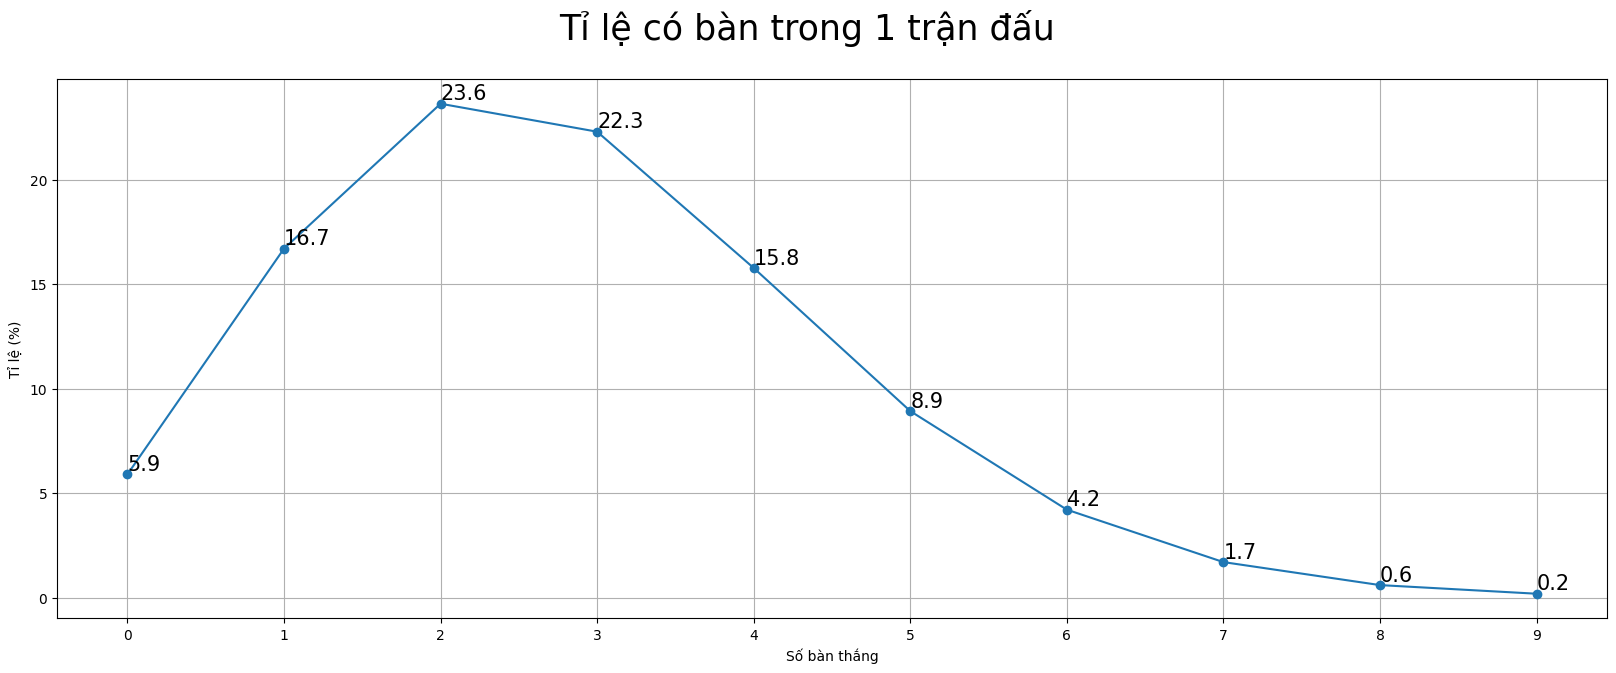

In [8]:
fig = plt.figure(figsize= (20,7))
plt.plot(k,p,'o-')
plt.xticks(range(10))
fig.suptitle('Tỉ lệ có bàn trong 1 trận đấu',fontsize=25)
plt.xlabel('Số bàn thắng')
plt.ylabel('Tỉ lệ (%)')
for x,y in zip(k,p):

    label = "{:.1f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset pixels",
                 xytext=(0,4), 
                 ha='left',fontsize=15)
plt.grid(True)

In [9]:

# Tính trung bình số bàn thắng và bàn thua khi thi đấu sân nhà cho mỗi đội
home_goals_avg = df.loc[df['venue'] == 'Home'].groupby('team')['gf'].mean()
home_goals_conceded_avg = df.loc[df['venue'] == 'Home'].groupby('team')['ga'].mean()

# Tính trung bình số bàn thắng và bàn thua khi thi đấu sân khách cho mỗi đội
away_goals_avg = df.loc[df['venue'] == 'Away'].groupby('opponent')['ga'].mean()
away_goals_conceded_avg = df.loc[df['venue'] == 'Away'].groupby('opponent')['gf'].mean()


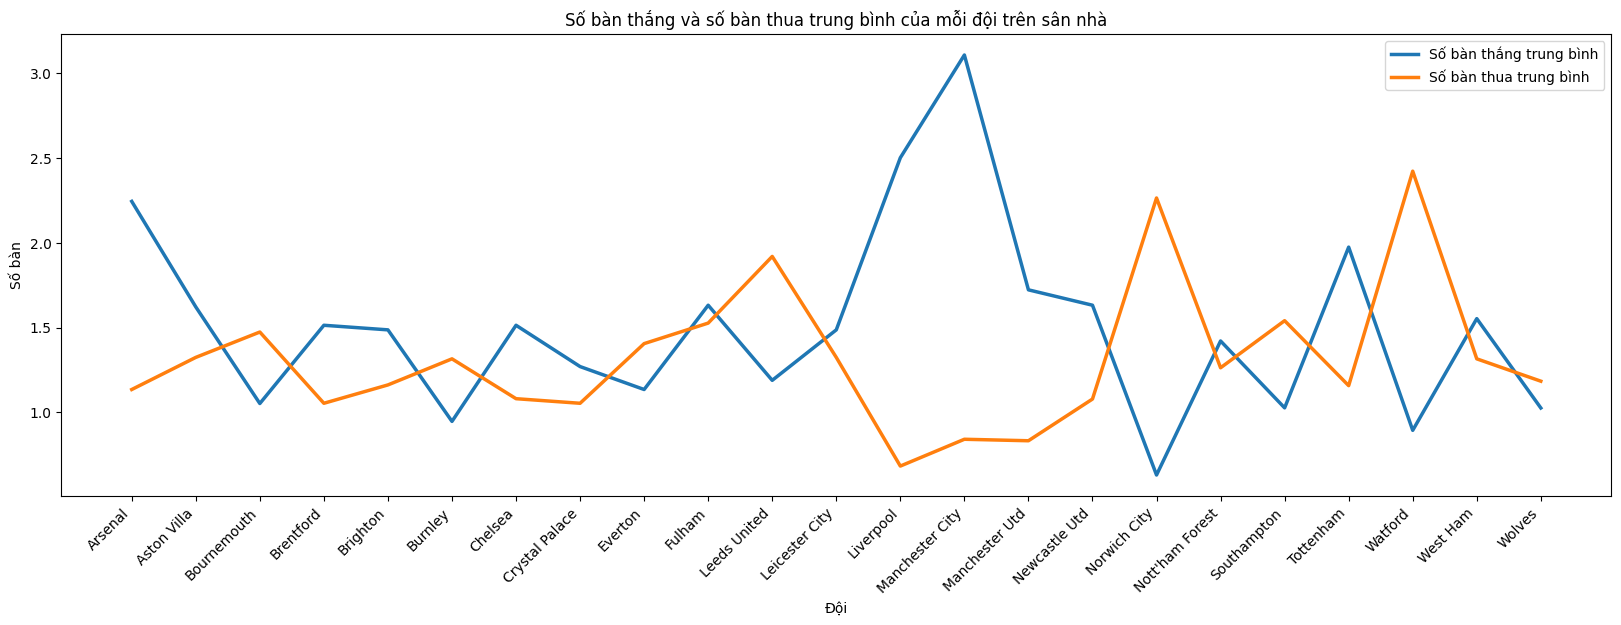

In [10]:

plt.figure(figsize=(20, 6))  

# Vẽ biểu đồ số bàn thắng và số bàn thua trung bình của mỗi đội trên sân nhà
sns.lineplot(data=home_goals_avg, x=home_goals_avg.index, y=home_goals_avg.values, label='Số bàn thắng trung bình', linewidth= 2.5)
sns.lineplot(data=home_goals_conceded_avg, x=home_goals_conceded_avg.index, y=home_goals_conceded_avg.values, label='Số bàn thua trung bình', linewidth= 2.5)

plt.title('Số bàn thắng và số bàn thua trung bình của mỗi đội trên sân nhà')
plt.xlabel('Đội')
plt.ylabel('Số bàn')
plt.xticks(rotation=45, ha='right')  
plt.legend()  

# Hiển thị biểu đồ
plt.show()


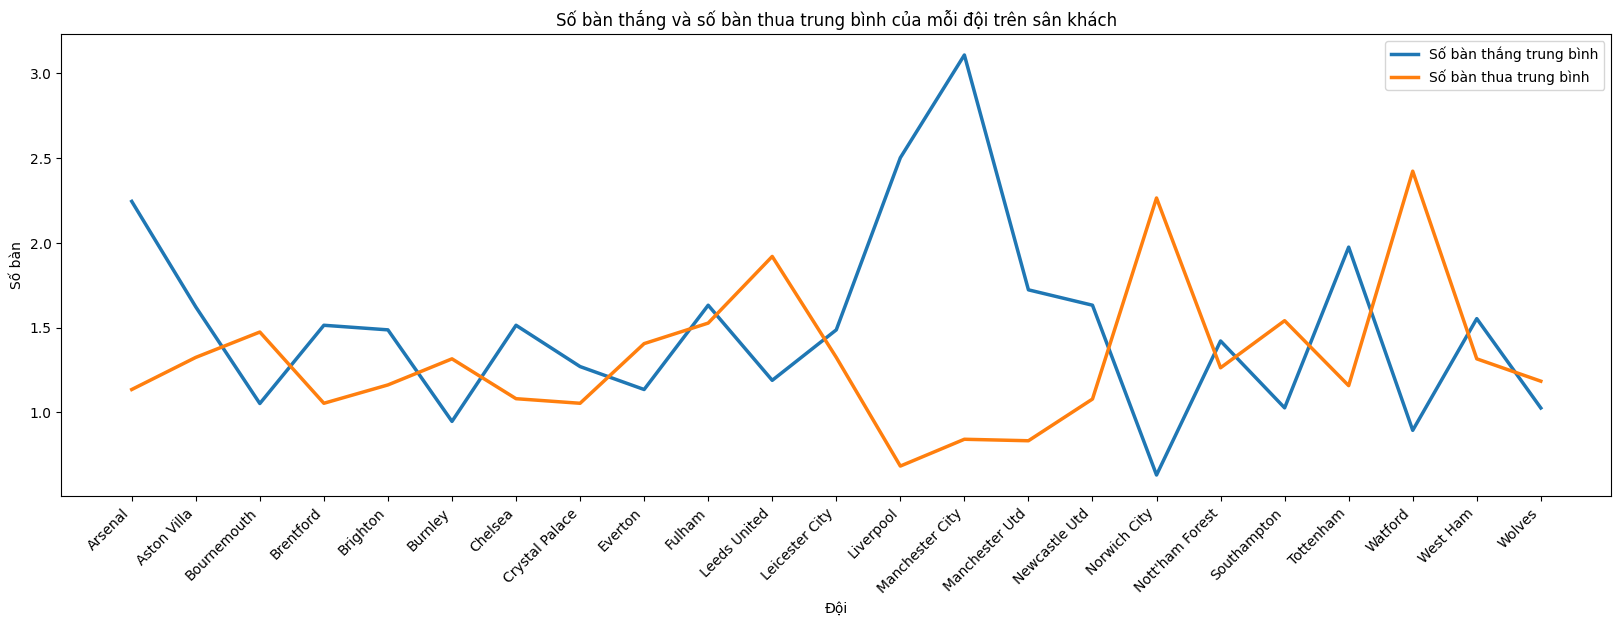

In [37]:

plt.figure(figsize=(20, 6))  

# Vẽ biểu đồ số bàn thắng và số bàn thua trung bình của mỗi đội trên sân khách
sns.lineplot(data=away_goals_avg, x=away_goals_avg.index, y=away_goals_avg.values, label='Số bàn thắng trung bình', linewidth= 2.5)
sns.lineplot(data=away_goals_conceded_avg, x=away_goals_conceded_avg.index, y=away_goals_conceded_avg.values, label='Số bàn thua trung bình', linewidth= 2.5)

plt.title('Số bàn thắng và số bàn thua trung bình của mỗi đội trên sân khách')
plt.xlabel('Đội')
plt.ylabel('Số bàn')
plt.xticks(rotation=45, ha='right')  
plt.legend()  

# Hiển thị biểu đồ
plt.show()

In [12]:
import numpy as np
from scipy import stats
counts = np.random.poisson(lamda,10)
print(int(stats.mode(counts)[0]))

2


C:\Users\trong\AppData\Local\Temp\ipykernel_26456\620566654.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(int(stats.mode(counts)[0]))


In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [14]:
def outlier_handling(X_train, X_test, variable, dist='gaussian'):
        if dist=='gaussian':
            uppper_boundary=int(X_train[variable].mean()+3*X_train[variable].std())
            lower_boundary=int(X_train[variable].mean()-3*X_train[variable].std())
            X_train.loc[X_train[variable]>uppper_boundary,variable]=uppper_boundary
            X_test.loc[X_test[variable]>uppper_boundary,variable]=uppper_boundary
        elif dist=='skewed':
            IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)
            upper_bridge = int(X_train[variable].quantile(0.75) + (IQR * 3))
            lower_bridge = int(X_train[variable].quantile(0.25) - (IQR * 3))
            X_train.loc[X_train[variable]>upper_bridge,variable]=upper_bridge
            X_test.loc[X_test[variable]>upper_bridge,variable]=upper_bridge
        else:
            pass
        return X_train, X_test

def fit_transform(X, method='Normalizer'):
        if method == 'Normalizer':
            return Normalizer().fit_transform(X)
        else:
            return X

In [15]:
matches = pd.read_csv("D:\\Data\\1000_clean_data.csv", index_col=0)
matches["date"] = pd.to_datetime(matches["date"])
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,target,venue_code,opp_code,hour,day_code
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,...,1.0,1.0,1.0,2023,Manchester City,1,0,21,16,6
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,0.0,0.0,0.0,2023,Manchester City,1,1,2,15,5
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,...,1.0,0.0,0.0,2023,Manchester City,0,0,15,16,6
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,0.0,0.0,0.0,2023,Manchester City,1,1,7,15,5
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,...,0.0,0.0,0.0,2023,Manchester City,1,1,17,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0.0,2.0,Aston Villa,...,0.0,0.0,0.0,2022,Norwich City,0,0,1,15,5
39,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0.0,4.0,West Ham,...,1.0,0.0,0.0,2022,Norwich City,0,1,21,14,6
40,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0.0,3.0,Leicester City,...,0.0,0.0,0.0,2022,Norwich City,0,0,11,19,2
41,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1.0,1.0,Wolves,...,0.0,0.0,0.0,2022,Norwich City,0,0,22,14,6


### Thêm các đặc trưng phong độ của đội bóng trong 5 trận gần nhất

In [16]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(5, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [17]:
cols = ["gf", "ga","poss", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [18]:
matches_rolling = matches_rolling.droplevel('team')
matches_rolling.index = range(matches_rolling.shape[0])
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,gf_rolling,ga_rolling,poss_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2021-09-26,16:30,Premier League,Matchweek 6,Sun,Home,W,3.0,1.0,Tottenham,...,6,0.4,1.8,44.8,14.4,3.2,16.42,0.6,0.0,0.0
1,2021-10-02,17:30,Premier League,Matchweek 7,Sat,Away,D,0.0,0.0,Brighton,...,5,1.0,1.6,41.2,12.4,3.8,16.16,0.4,0.0,0.0
2,2021-10-18,20:00,Premier League,Matchweek 8,Mon,Home,D,2.0,2.0,Crystal Palace,...,0,1.0,1.2,42.6,12.8,3.6,16.64,0.6,0.0,0.0
3,2021-10-22,20:00,Premier League,Matchweek 9,Fri,Home,W,3.0,1.0,Aston Villa,...,4,1.4,0.6,49.4,16.0,4.8,18.80,0.8,0.0,0.0
4,2021-10-30,12:30,Premier League,Matchweek 10,Sat,Away,W,2.0,0.0,Leicester City,...,5,1.8,0.8,49.8,14.2,5.2,18.88,0.8,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,2023-04-25,19:30,Premier League,Matchweek 33,Tue,Home,W,2.0,0.0,Crystal Palace,...,1,1.4,1.4,56.4,13.4,5.0,19.32,0.6,0.0,0.0
1377,2023-04-29,15:00,Premier League,Matchweek 34,Sat,Away,L,0.0,6.0,Brighton,...,5,1.4,0.6,51.6,10.4,3.8,19.50,0.4,0.2,0.2
1378,2023-05-06,15:00,Premier League,Matchweek 35,Sat,Home,W,1.0,0.0,Aston Villa,...,5,1.2,1.6,46.0,10.8,4.0,19.80,0.4,0.2,0.2
1379,2023-05-13,15:00,Premier League,Matchweek 36,Sat,Away,L,0.0,2.0,Manchester Utd,...,5,1.2,1.6,46.0,10.2,3.6,18.48,0.4,0.2,0.2


In [19]:
# Lấy các đặc trưng quan tâm
features = ["gf_rolling", "ga_rolling", "poss_rolling", "sh_rolling", "sot_rolling", "dist_rolling", "fk_rolling", "pk_rolling", "pkatt_rolling"]
X = matches_rolling[features]
y_gf = matches_rolling['gf']
y_ga = matches_rolling['ga']

#### Xử lí dữ liệu

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_gf, test_size=0.3, random_state=42)
X_train.head()

,gf_rolling,ga_rolling,poss_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
482,1.2,1.2,55.4,13.0,3.6,17.80,0.4,0.2,0.2
59,2.6,1.4,69.4,17.0,4.2,17.06,0.6,0.2,0.2
405,1.2,1.4,61.0,16.2,4.8,17.62,0.2,0.2,0.2
464,0.4,1.8,46.2,11.0,3.0,17.36,0.2,0.0,0.2
1302,1.4,2.0,42.0,11.2,3.0,15.38,0.4,0.2,0.2


In [21]:
import itertools
results = pd.DataFrame(columns=['Outlier_ga_rolling', 'Transform', 'Error after 10 times'])
outlier_ga_rolling = ['none','gaussian','skewed']
transform = ['none', 'Normalize']
combinations = list(itertools.product(outlier_ga_rolling, transform))
len(combinations)

6

In [22]:
for i in range(len(combinations)):
    type_outlier_ga_rolling, type_transform = combinations[i]
    accuracy = []
    print("{0} - {1}".format(i, combinations[i]))
    for j in range(0, 10):
        X = matches_rolling[features]
        y = matches_rolling["gf"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=j)

        X_train, X_test = outlier_handling(X_train, X_test, "gf_rolling", type_outlier_ga_rolling)
        
        X_train = fit_transform(X_train, type_transform)
        X_test = fit_transform(X_test, type_transform)
        
        classifier=PoissonRegressor(max_iter=500)
        classifier.fit(X_train, y_train)
        y_pred=classifier.predict(X_test)
        accuracy.append(metrics.mean_squared_error(y_test,y_pred))
        
    result = {'Outlier_ga_rolling': type_outlier_ga_rolling, 'Transform': type_transform, 'Error after 10 times': sum(accuracy)/len(accuracy)}
    results = pd.concat([results, pd.DataFrame([result])], ignore_index=True)

0 - ('none', 'none')
1 - ('none', 'Normalize')
2 - ('gaussian', 'none')
3 - ('gaussian', 'Normalize')
4 - ('skewed', 'none')
5 - ('skewed', 'Normalize')


In [23]:
results

,Outlier_ga_rolling,Transform,Error after 10 times
0,none,none,1.588041
1,none,Normalize,1.588041
2,gaussian,none,1.588669
3,gaussian,Normalize,1.588669
4,skewed,none,1.587953
5,skewed,Normalize,1.587953


In [24]:
results['Error after 10 times'].min()

1.587952918739995

In [25]:
results.query('`Error after 10 times` == `Error after 10 times`.min()')

,Outlier_ga_rolling,Transform,Error after 10 times
4,skewed,none,1.587953
5,skewed,Normalize,1.587953


#### Mô hình dự đoán số bàn thắng ghi được và số bàn thua

In [26]:
X = matches_rolling[features]
y = matches_rolling[["gf", "ga", "target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train, X_val = outlier_handling(X_train, X_val, "gf_rolling", "skewed")

gf_regression=PoissonRegressor(max_iter=500)
gf_regression.fit(X_train, y_train["gf"])
gf_y_pred=gf_regression.predict(X_val)

ga_regression=PoissonRegressor(max_iter=500)
ga_regression.fit(X_train, y_train["ga"])
ga_y_pred=ga_regression.predict(X_val)



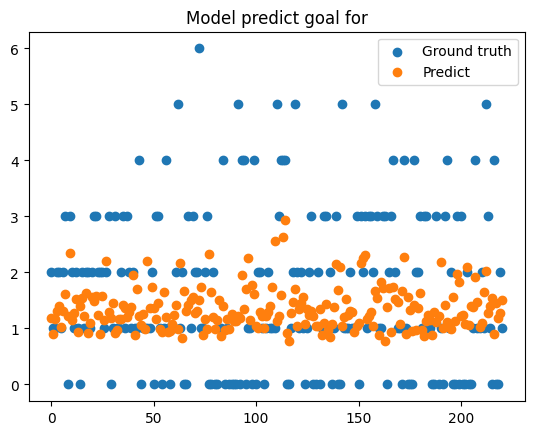

In [27]:
plt.scatter(np.arange(0, len(gf_y_pred)), y_val["gf"], label="Ground truth")
plt.scatter(np.arange(0, len(gf_y_pred)), gf_y_pred, label="Predict")
plt.title("Model predict goal for")
plt.legend();

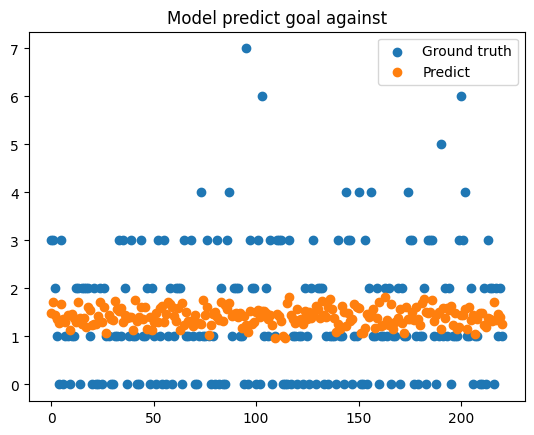

In [28]:
plt.scatter(np.arange(0, len(ga_y_pred)), y_val["ga"], label="Ground truth")
plt.scatter(np.arange(0, len(ga_y_pred)), ga_y_pred, label="Predict")
plt.title("Model predict goal against")
plt.legend();

#### Test

In [29]:
def get_acc_rsl(xg, xga):
    rsls = [[[0,0], [0,1], [0,2], [0,3]],
            [[1,0], [1,1], [1,2], [1,3]],
            [[2,0], [2,1], [2,2], [2,3]],
            [[3,0], [3,1], [3,2], [3,3]]]
    accs = []
    for node in rsls:
        acc_ = []
        for rsl in node:
            acc = float(0.0)
            gf, ga = rsl[0], rsl[1]
            gf_level = abs(gf-xg)
            ga_level = abs(ga-xga)
            if gf_level < 0.2:
                acc = float(0.7)
            elif gf_level < 0.5:
                acc = float(0.3)
            elif gf_level < 1:
                acc = float(0.2)
            else:
                acc = float(0.1)
            
            if ga_level < 0.2:
                acc *= float(0.9)
            elif ga_level < 0.5:
                acc *= float(0.35)
            elif ga_level < 1:
                acc *= float(0.3)
            else:
                acc *= float(0.1)
            acc_.append(acc)
        accs.append(acc_)
    return accs

In [30]:
def get_result_prediction(accs):
    draw = float(0.0)
    win = float(0.0)
    lose = float(0.0)
    for i in range(4):
        for j in range(4):
            if i == j:
                draw += accs[i][j]
            elif i > j:
                win += accs[i][j]
            elif i < j:
                lose += accs[i][j]
    return [win, draw, lose]

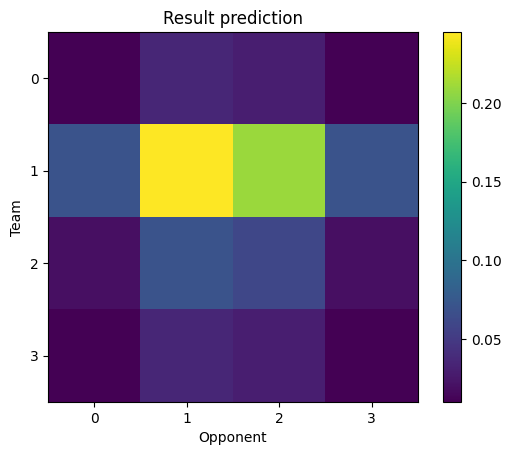

In [31]:
plt.imshow(get_acc_rsl(gf_y_pred[0],ga_y_pred[0]), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2, 3])
plt.yticks([0, 1, 2, 3])
plt.title('Result prediction')
plt.xlabel("Opponent")
plt.ylabel("Team")
plt.show()

In [32]:
get_result_prediction(get_acc_rsl(gf_y_pred[0],ga_y_pred[0]))

[0.235, 0.32499999999999996, 0.37500000000000006]

In [33]:
gf_y_pred=gf_regression.predict(X_test)
ga_y_pred=gf_regression.predict(X_test)

In [34]:
test = y_test["target"]

In [35]:
pred_true = int(0)
for i in range(len(gf_y_pred)):
    rsl = int(0)
    w, d, l = get_result_prediction(get_acc_rsl(gf_y_pred[i],ga_y_pred[i]))
    if w > d and w > l:
        rsl = int(1)
    if rsl == test.iloc[i]:
        pred_true += 1

In [36]:
pred_true/len(gf_y_pred)

0.6028880866425993